<a href="https://colab.research.google.com/github/DzawilUqul/VehiclesSales-Corellation/blob/main/Vehicles_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicle Sales Data
The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.

## Using Kaggle API
Mendapatkan dataset publik dari kaggle menggunakan Kaggle API

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          21212        427  0.9411765        
sahirmaharajj/retail-sales-analysis                         Retail Sales Analysis                            6MB  2024-03-31 15:37:11           1159         27  1.0              
bhavikjikadara/student-study-performance                    Student Study Performance                        9KB  2024-03-07 06:14:09          10595        146  1.0              
nbroad/gemma-rewrite-nbroad                                 gemma-rewrite-nbroad                         

In [ ]:
!kaggle datasets download -d syedanwarafridi/vehicle-sales-data

 74% 14.0M/18.8M [00:00<00:00, 144MB/s]
100% 18.8M/18.8M [00:00<00:00, 156MB/s]


In [ ]:
!unzip vehicle-sales-data.zip

Archive:  vehicle-sales-data.zip
  inflating: car_prices.csv          


In [ ]:
import pandas as pd
data = pd.read_csv("car_prices.csv")

In [ ]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Finding Outliers with the 3-Sigma Rule

In [ ]:
mean = data[['sellingprice']].mean()
mean

sellingprice    13611.35881
dtype: float64

In [ ]:
stdev = data[['sellingprice']].std()
stdev

sellingprice    9749.501628
dtype: float64

In [ ]:
iso = (data[['sellingprice']] < mean - 3*stdev) | (data[['sellingprice']] > mean + 3*stdev)
iso

,sellingprice
0,False
1,False
2,False
3,False
4,True
...,...
558832,False
558833,False
558834,False
558835,False


In [ ]:
df1 = data[['model', 'sellingprice']].assign(is_outlier=iso)
df1

,model,sellingprice,is_outlier
0,Sorento,21500.0,False
1,Sorento,21500.0,False
2,3 Series,30000.0,False
3,S60,27750.0,False
4,6 Series Gran Coupe,67000.0,True
...,...,...,...
558832,K900,33000.0,False
558833,2500,30800.0,False
558834,X5,34000.0,False
558835,Altima,11100.0,False


In [ ]:
df1.loc[df1['is_outlier']]

,model,sellingprice,is_outlier
4,6 Series Gran Coupe,67000.0,True
6,M5,65000.0,True
10,A6,49750.0,True
19,6 Series,67200.0,True
24,6 Series,65000.0,True
...,...,...,...
558640,Escalade,62000.0,True
558668,LR4,44500.0,True
558776,NaN,47000.0,True
558807,E-Class,69500.0,True


Didapatkan outliers sebanyak 6967 data  

## Finding Outliers With the Tukey's Fence

In [ ]:
q1 = data['sellingprice'].quantile(q=0.25)
q3 = data['sellingprice'].quantile(q=0.75)
iqr = q3-q1

iso = (data['sellingprice'] < q1 - 1.5*iqr) | (data['sellingprice'] > q3 + 1.5*iqr)
iso

0         False
1         False
2         False
3         False
4          True
          ...  
558832    False
558833    False
558834    False
558835    False
558836    False
Name: sellingprice, Length: 558837, dtype: bool

In [ ]:
iseo = (data['sellingprice'] < q1 - 3*iqr) | (data['sellingprice'] > q3 + 3*iqr)
iseo

0         False
1         False
2         False
3         False
4          True
          ...  
558832    False
558833    False
558834    False
558835    False
558836    False
Name: sellingprice, Length: 558837, dtype: bool

In [ ]:
df1 = data[['model', 'sellingprice']].assign(is_outlier = iso, is_extreme_outlier = iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,model,sellingprice,is_outlier,is_extreme_outlier
4,6 Series Gran Coupe,67000.0,True,True
6,M5,65000.0,True,True
10,A6,49750.0,True,False
17,Q5,40000.0,True,False
19,6 Series,67200.0,True,True
...,...,...,...,...
558776,NaN,47000.0,True,False
558777,Quattroporte,40250.0,True,False
558807,E-Class,69500.0,True,True
558816,G-Class,105000.0,True,True


In [ ]:
df1['is_outlier'].sum()

16354

Didapatkan outliers sebanyak 16354 data

In [ ]:
df1['is_extreme_outlier'].sum()

2927

Didapatkan extreme outliers sebanyak 2927 data

## Frequency Table

In [ ]:
data['model'].value_counts()

model
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: count, Length: 973, dtype: int64

In [ ]:
data.groupby('model')[['sellingprice']].mean().sort_values(by='sellingprice', ascending=False)

,sellingprice
model,
458 Italia,183000.000000
SLS AMG GT,156500.000000
i8,154222.222222
Flying Spur,154000.000000
Ghost,153488.235294
...,...
Spirit,300.000000
cavalier,300.000000
300e,300.000000


## Correlation Analysis

In [ ]:
data.loc[:,'model':].corr(numeric_only=True)

,condition,odometer,mmr,sellingprice
condition,1.000000,-0.318188,0.281415,0.321944
odometer,-0.318188,1.000000,-0.588113,-0.582393
mmr,0.281415,-0.588113,1.000000,0.983635
sellingprice,0.321944,-0.582393,0.983635,1.000000


Korelasi sebesar 0.98 antara MMR (Manheim Market Report) dan sellingprice menunjukkan hubungan linier yang sangat kuat di antara keduanya, yang berarti bahwa perubahan dalam MMR hampir selalu diikuti oleh perubahan dalam sellingprice dengan arah yang sama.

Berdasarkan perhitungan, hasil korelasi sebesar 0.98 menunjukkan adanya korelasi positif yang sangat kuat antara jumlah MMR (Manheim Market Report) dan sellingprice (Harga Jual). Nilai korelasi sebesar 0.98 mendekati 1, yang mengindikasikan hubungan yang sangat kuat di antara kedua variabel tersebut. Artinya, dalam konteks MMR, ketika jumlah harga jual meningkat, jumlah MMR cenderung
meningkat secara signifikan. Hasil ini diperkuat secara visualisasi berikut.

## Visualization

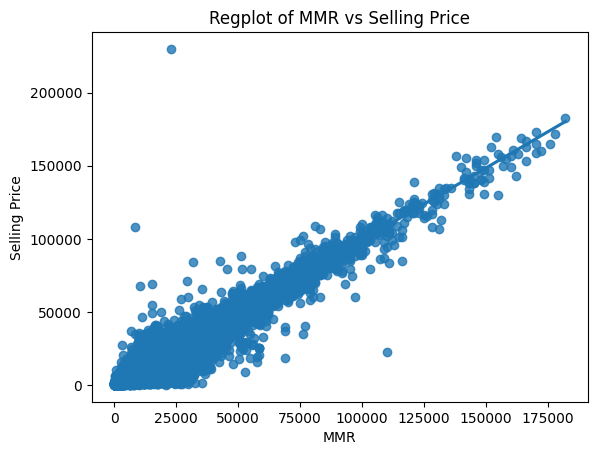

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan df1 adalah DataFrame yang berisi data MMR dan harga jual
MMR_column = 'mmr'
selling_price_column = 'sellingprice'

# Membuat regplot
sns.regplot(x=data[MMR_column], y=data[selling_price_column])

# Memberikan label sumbu x dan y
plt.xlabel('MMR')
plt.ylabel('Selling Price')

# Memberikan judul plot
plt.title('Regplot of MMR vs Selling Price')

# Menampilkan plot
plt.show()


Hasil dari visualisasi pada Gambar tersebut menunjukkan tren positif yang kuat antara MMR dan harga jual. Tren positif ini berarti bahwa ketika MMR meningkat, jumlah harga jual juga cenderung meningkat.

In [ ]:
# Function to plot pie chart
def plot_pie_chart(column):
    plt.figure(figsize=(6, 6))  # Adjust the figsize for smaller pie charts
    data[column].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()


def plot_hist_chart(column):
    plt.figure(figsize=(8, 4))  # Adjust the figsize for smaller histogram charts
    data[column].hist()
    plt.title(f'{column} Distribution')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()


#### Distribusi Perusahaan Pembuat Kendaraan

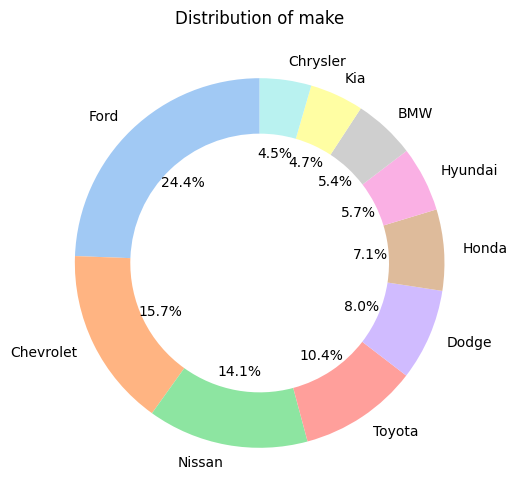

In [ ]:
plot_pie_chart('make')

#### Distribusi Warna Kendaraan

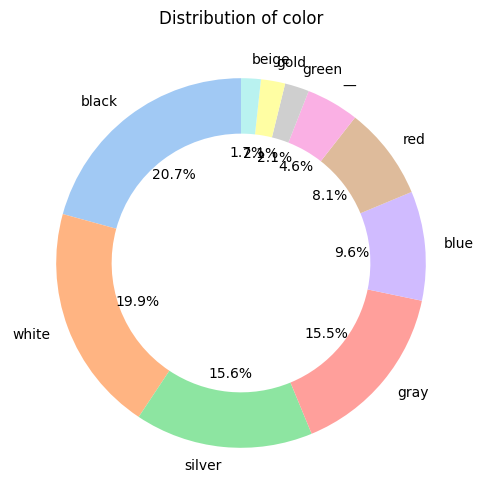

In [ ]:
plot_pie_chart('color')

#### Distribusi MMR (Manheim Market Report)

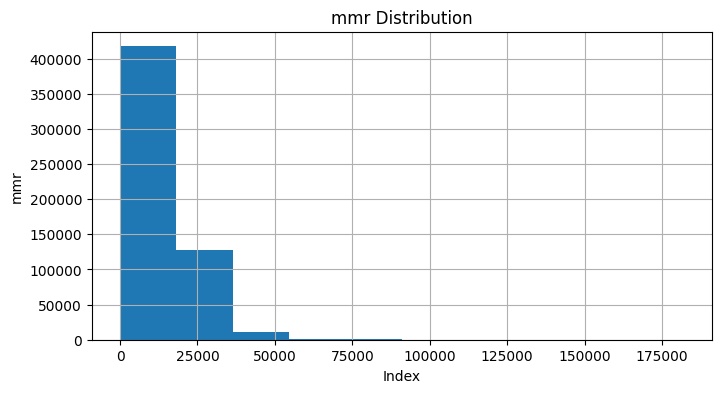

In [ ]:
plot_hist_chart('mmr')

#### Distribusi Harga Jual Kendaraan

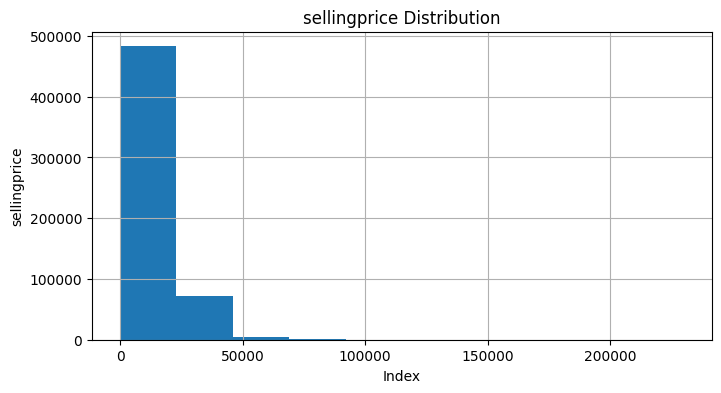

In [ ]:
plot_hist_chart('sellingprice')